# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\steve\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
# YOUR CODE HERE!
api_key = os.getenv('NEWS_API')

In [3]:
# Create a newsapi client
# YOUR CODE HERE!
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key='bb0eef0b1556490cb4b7a7dff81a69c0')

In [4]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!
btc_news = newsapi.get_everything(q='Bitcoin',
                                  language='en',
                                  sort_by='relevancy'
                                 )
#sample article
btc_news["articles"][0]

{'source': {'id': 'the-verge', 'name': 'The Verge'},
 'author': 'Richard Lawler',
 'title': 'A fake press release claiming Kroger accepts crypto reached the retailer’s own webpage',
 'description': 'A crypto hoax claimed Kroger is accepting Bitcoin Cash. The fake press release was similar to one targeting Walmart earlier this year. The retailer quickly confirmed it’s fake, but not before the cryptocurrency’s price spiked by $30.',
 'url': 'https://www.theverge.com/2021/11/5/22765098/kroger-bitcoin-cash-cryptocurrency-hoax-pump-dump',
 'urlToImage': 'https://cdn.vox-cdn.com/thumbor/CKp0YjnwF88--mWg1kfPmspvfzY=/0x358:5000x2976/fit-in/1200x630/cdn.vox-cdn.com/uploads/chorus_asset/file/22988084/1234440443.jpg',
 'publishedAt': '2021-11-05T13:32:14Z',
 'content': 'A similar hoax earlier this year tied Walmart to Litecoin\r\nIf you buy something from a Verge link, Vox Media may earn a commission. See our ethics statement.\r\nPhoto Illustration by Thiago Prudencio/S… [+1900 chars]'}

In [5]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!
eth_news = newsapi.get_everything(q='Ethereum',
                                  language='en',
                                  sort_by='relevancy'
                                 )
# Show sample article
eth_news["articles"][0]

{'source': {'id': 'the-verge', 'name': 'The Verge'},
 'author': 'Mitchell Clark',
 'title': 'The NFT Bay asks if you would steal all the JPEGs',
 'description': 'The NFT Bay is an incredible piece of performance art that promises to let you download all the NFTs on the Ethereum blockchain. The torrent contains nearly 20TB worth of files, and works as a commentary on collecting and owning.',
 'url': 'https://www.theverge.com/2021/11/18/22790131/nft-bay-pirating-digital-ownership-piracy-crypto-art-right-click',
 'urlToImage': 'https://cdn.vox-cdn.com/thumbor/UMHdxnP0BlxxYxbIu9Ea5K1QwGk=/0x0:2028x1062/fit-in/1200x630/cdn.vox-cdn.com/uploads/chorus_asset/file/23025815/Screen_Shot_2021_11_18_at_14.21.58.png',
 'publishedAt': '2021-11-19T02:01:07Z',
 'content': 'If you claim ownership, someone will probably want to take it\r\nIn what may be one of the better pieces of performance art this year, Australian Geoffrey Huntley has created a website that promises to… [+4542 chars]'}

In [6]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!
btc_sentiments = []

for article in btc_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiments.append({
            "Date": date,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
            "text": text      
        })
        
    except AttributeError:
        pass

#create and order dataframe
btc_df = pd.DataFrame(btc_sentiments)
btc_cols = ["Date","Compound", "Negative", "Neutral", "Positive", "text"]
btc_df = btc_df[btc_cols]

btc_df.head()

,Date,Compound,Negative,Neutral,Positive,text
0,2021-11-05,-0.2732,0.063,0.937,0.000,A similar hoax earlier this year tied Walmart ...
1,2021-10-28,0.3612,0.000,0.904,0.096,Theres a big new presence slurping up power fr...
2,2021-11-22,0.0000,0.000,1.000,0.000,"MIZATA, El Salvador/LONDON, Nov 22 (Reuters) -..."
3,2021-11-12,0.5719,0.000,0.847,0.153,"In keeping with a previous announcement, AMC t..."
4,2021-11-22,0.4767,0.000,0.864,0.136,Posted \r\nAfter becoming the first country to...


In [7]:
# Create the Ethereum sentiment scores DataFrame
# YOUR CODE HERE!
eth_sentiments = []

for article in eth_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "Date": date,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
            "text": text      
        })
        
    except AttributeError:
        pass



In [8]:
#create and order dataframe
eth_df = pd.DataFrame(eth_sentiments)
eth_cols = ["Date","Compound", "Negative", "Neutral", "Positive", "text"]
eth_df = eth_df[eth_cols]

eth_df.head()

,Date,Compound,Negative,Neutral,Positive,text
0,2021-11-19,0.7783,0.0,0.784,0.216,"If you claim ownership, someone will probably ..."
1,2021-11-24,0.0000,0.0,1.000,0.000,More than $1.2 million has already been spent ...
2,2021-11-23,0.6542,0.0,0.822,0.178,Ethereum has been on a tear this year. Its out...
3,2021-11-12,0.5719,0.0,0.847,0.153,"In keeping with a previous announcement, AMC t..."
4,2021-11-05,0.4588,0.0,0.906,0.094,Ethereum and bitcoin are the two biggest crypt...


In [9]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!
btc_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.134750,0.015550,0.938600,0.045800
std,0.325372,0.039944,0.064563,0.060123
min,-0.680800,0.000000,0.833000,0.000000
25%,0.000000,0.000000,0.883500,0.000000
50%,0.000000,0.000000,0.947000,0.000000
75%,0.390075,0.000000,1.000000,0.099500
max,0.571900,0.167000,1.000000,0.153000


In [10]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!
eth_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.285625,0.006200,0.921300,0.072450
std,0.319136,0.019083,0.073379,0.074185
min,-0.318200,0.000000,0.779000,0.000000
25%,0.000000,0.000000,0.892500,0.000000
50%,0.371500,0.000000,0.922000,0.074000
75%,0.530600,0.000000,1.000000,0.097500
max,0.817600,0.062000,1.000000,0.221000


### Questions:

Q: Which coin had the highest mean positive score?

A: 

Q: Which coin had the highest compound score?

A: 

Q. Which coin had the highest positive score?

A: 

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [11]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [12]:
# Instantiate the lemmatizer
# YOUR CODE HERE!
lemmatizer = WordNetLemmatizer()
# Create a list of stopwords
# YOUR CODE HERE!
sw = set(stopwords.words('english'))

In [48]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    words = word_tokenize(text)
    words = list(filter(lambda w: w.lower(), words))
    words = list(filter(lambda t: t not in punctuation, words))
    words = list(filter(lambda t: t.lower() not in sw, words))
    tokens = [lemmatizer.lemmatize(word) for word in words]
    
    return tokens

In [49]:
# Create a new tokens column for Bitcoin
# YOUR CODE HERE!
btc_df['tokens'] = btc_df['text'].apply(tokenizer)
btc_df.head()

,Date,Compound,Negative,Neutral,Positive,text,tokens
0,2021-11-05,-0.2732,0.063,0.937,0.000,A similar hoax earlier this year tied Walmart ...,"[similar, hoax, earlier, year, tied, Walmart, ..."
1,2021-10-28,0.3612,0.000,0.904,0.096,Theres a big new presence slurping up power fr...,"[Theres, big, new, presence, slurping, power, ..."
2,2021-11-22,0.0000,0.000,1.000,0.000,"MIZATA, El Salvador/LONDON, Nov 22 (Reuters) -...","[MIZATA, El, Salvador/LONDON, Nov, 22, Reuters..."
3,2021-11-12,0.5719,0.000,0.847,0.153,"In keeping with a previous announcement, AMC t...","[keeping, previous, announcement, AMC, theater..."
4,2021-11-22,0.4767,0.000,0.864,0.136,Posted \r\nAfter becoming the first country to...,"[Posted, becoming, first, country, accept, cry..."


In [30]:
# Create a new tokens column for Ethereum
# YOUR CODE HERE!
eth_df['tokens'] = eth_df['text'].apply(tokenizer)
eth_df.head()

,Date,Compound,Negative,Neutral,Positive,text,tokens
0,2021-11-19,0.7783,0.0,0.784,0.216,"If you claim ownership, someone will probably ...","[claim, ownership, someone, probably, want, ta..."
1,2021-11-24,0.0000,0.0,1.000,0.000,More than $1.2 million has already been spent ...,"[1.2, million, already, spent, gas, fee, One, ..."
2,2021-11-23,0.6542,0.0,0.822,0.178,Ethereum has been on a tear this year. Its out...,"[Ethereum, tear, year, outperformed, bitcoin, ..."
3,2021-11-12,0.5719,0.0,0.847,0.153,"In keeping with a previous announcement, AMC t...","[keeping, previous, announcement, AMC, theater..."
4,2021-11-05,0.4588,0.0,0.906,0.094,Ethereum and bitcoin are the two biggest crypt...,"[Ethereum, bitcoin, two, biggest, cryptocurren..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [31]:
from collections import Counter
from nltk import ngrams

In [32]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!
grams = ngrams(tokenizer(btc_df.text.str.cat()), 2)
Counter(grams).most_common(10)

[(('El', 'Salvador'), 3),
 (('Salvador', 'plan'), 3),
 (('plan', 'build'), 3),
 (('build', 'world'), 3),
 (('world', "'s"), 3),
 (("'s", 'first'), 3),
 (('Bitcoin', 'City'), 3),
 (('char', 'Bitcoin'), 3),
 (('picture', 'illustration'), 3),
 (('illustration', 'taken'), 3)]

In [33]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!
grams = ngrams(tokenizer(eth_df.text.str.cat()), 2)
Counter(grams).most_common(10)

[(('Bitcoin', 'Ethereum'), 4),
 (('Getty', 'Images'), 3),
 (('Rahul', 'Rai'), 3),
 (('char', 'Ethereum'), 2),
 (('theater', 'accept'), 2),
 (('Elon', 'Musk'), 2),
 (('char', 'Representations'), 2),
 (('Representations', 'cryptocurrencies'), 2),
 (('cryptocurrencies', 'Bitcoin'), 2),
 (('Ethereum', 'DogeCoin'), 2)]

In [34]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [35]:
# Use token_count to get the top 10 words for Bitcoin
# YOUR CODE HERE!
all_tokens = tokenizer(btc_df.text.str.cat())
token_count(all_tokens, N=10)

[('char', 19),
 ('Bitcoin', 11),
 ('bitcoin', 7),
 ("'s", 7),
 ('cryptocurrency', 7),
 ('Reuters', 6),
 ('first', 6),
 ('…', 5),
 ('El', 4),
 ('Nov', 4)]

In [36]:
# Use token_count to get the top 10 words for Ethereum
# YOUR CODE HERE!
all_tokens = tokenizer(eth_df.text.str.cat())
token_count(all_tokens, N=10)

[('char', 20),
 ('Ethereum', 9),
 ('Bitcoin', 8),
 ('bitcoin', 6),
 ('cryptocurrency', 6),
 ('cryptocurrencies', 5),
 ('year', 4),
 ('Images', 4),
 ('…', 4),
 ('copy', 3)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [37]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

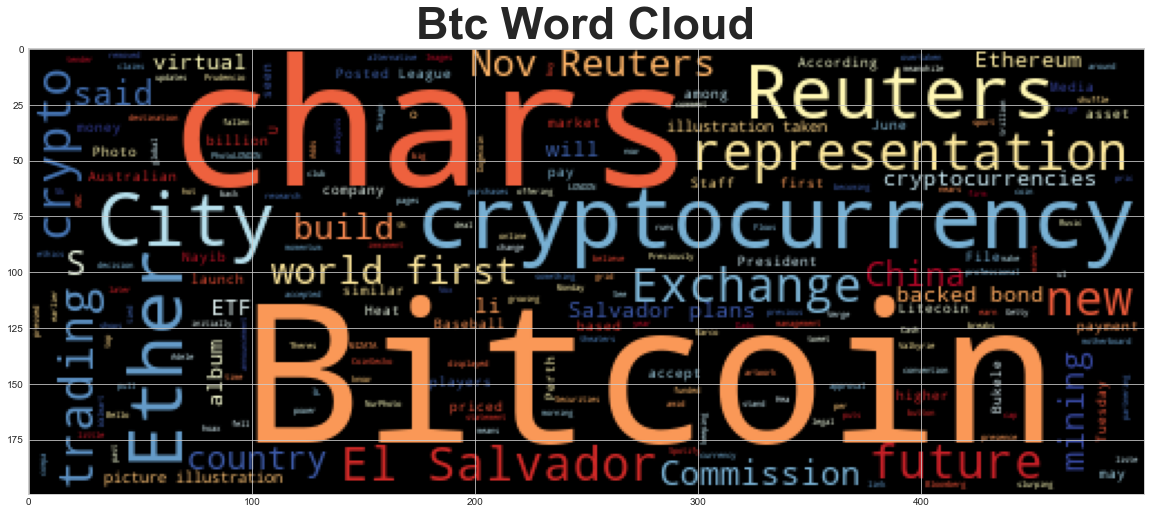

In [47]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!
def wordcloud(text, title=""):
    df_cloud = WordCloud(width=500, colormap='RdYlBu').generate(text)
    plt.imshow(df_cloud)
    fontdict = {"fontsize": 45, "fontweight": "bold"}
    plt.title(title, fontdict=fontdict)
    plt.show

wordcloud(btc_df.text.str.cat(), title= "Btc Word Cloud")

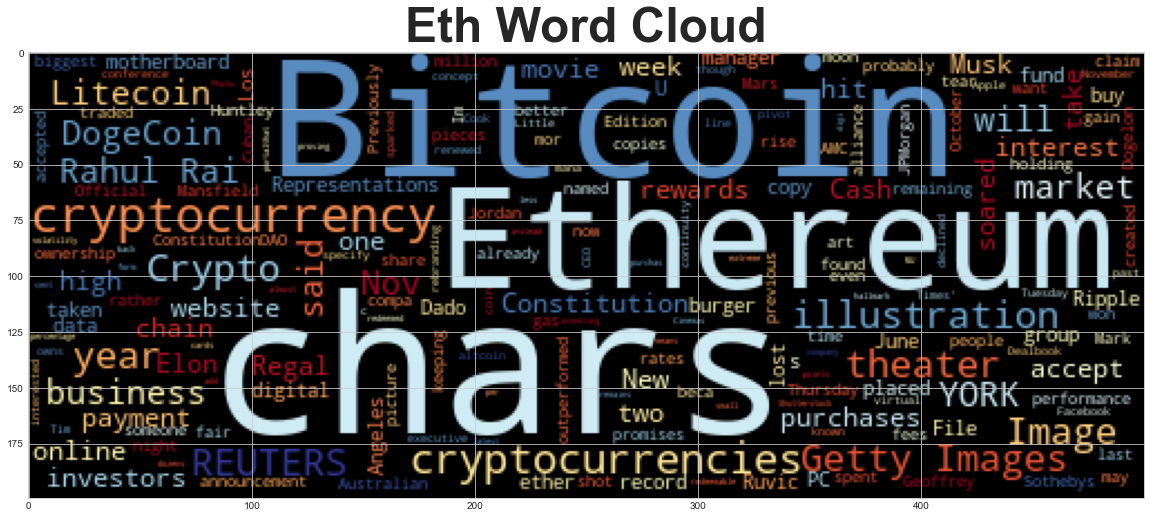

In [46]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!
wordcloud(eth_df.text.str.cat(), title= "Eth Word Cloud")

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [50]:
import spacy
from spacy import displacy

In [51]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [52]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [53]:
# Concatenate all of the Bitcoin text together
# YOUR CODE HERE!
all_btc_text = btc_df.text.str.cat()
all_btc_text

'A similar hoax earlier this year tied Walmart to Litecoin\r\nIf you buy something from a Verge link, Vox Media may earn a commission. See our ethics statement.\r\nPhoto Illustration by Thiago Prudencio/S… [+1900 chars]Theres a big new presence slurping up power from the U.S. grid, and its growing: bitcoin miners. New research shows that the U.S. has overtaken China as the top global destination for bitcoin mining … [+3088 chars]MIZATA, El Salvador/LONDON, Nov 22 (Reuters) - El Salvador plans to build the world\'s first "Bitcoin City" with money from a $1 billion bitcoin-backed bond the country\'s President Nayib Bukele said o… [+3147 chars]In keeping with a previous announcement, AMC theaters now accept cryptocurrencies as payment for online purchases.\xa0\r\nBitcoin, Ethereum, Bitcoin Cash and Litecoin are accepted.\xa0\r\nPreviously, the compa… [+1036 chars]Posted \r\nAfter becoming the first country to accept the cryptocurrency as legal tender, El Salvador plans to build the world\

In [54]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
ner = nlp(all_btc_text)
# Add a title to the document
# YOUR CODE HERE!
ner.user_data["title"] = 'Bitcoin NER'

In [56]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(ner, style='ent', jupyter=True)

In [58]:
# List all Entities
# YOUR CODE HERE!
for ent in ner.ents:
    print (ent.text, ent.label_)

earlier this year DATE
Verge ORG
Vox Media ORG
Thiago Prudencio/S PERSON
U.S. GPE
U.S. GPE
China GPE
El Salvador GPE
LONDON GPE
Nov 22 DATE
Reuters ORG
El Salvador GPE
first ORDINAL
Bitcoin City WORK_OF_ART
$1 billion MONEY
Nayib Bukele PERSON
AMC ORG
first ORDINAL
El Salvador GPE
first ORDINAL
Bitcoin City GPE
2021 DATE
Marco Bello PERSON
The Securities and Exchange Commission ORG
Valkyrie PERSON
Adele PERSON
30 CARDINAL
NurPhoto ORG
ETF ORG
>Bloomberg PERSON
first ORDINAL
ETF ORG
7% PERCENT
Monday DATE
morning TIME
around $66,105 MONEY
3% PERCENT
4,722 MONEY
over 9% PERCENT
Baseball League ORG
Perth Heat ORG
first ORDINAL
Hea PERSON
68,000 MONEY
$5k
 MONEY
CoinGecko ORG
more than $3 trillion MONEY
El Salvador GPE
first ORDINAL
Bitcoin City WORK_OF_ART
$1 billion MONEY
Nayib Bukele PERSON
May 20, 2021 DATE
REUTERS ORG
Dado Ruvic/File PhotoLONDON ORG
Nov 16 DATE
Reuters ORG
60 MONEY
Chinas PERSON
Tuesday DATE
Chinas National Development and Reform Commission ORG
Meng Wei PERSON
New Yor

---

### Ethereum NER

In [61]:
# Concatenate all of the Ethereum text together
# YOUR CODE HERE!
all_eth_text = eth_df.text.str.cat()


In [63]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
eth_ner = nlp(all_eth_text)
# Add a title to the document
# YOUR CODE HERE!
eth_ner.user_data['title'] = 'Eth NER'

In [64]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(eth_ner, style='ent', jupyter=True)

In [66]:
# List all Entities
# YOUR CODE HERE!
for ent in eth_ner.ents:
    print (ent.text, ent.label_)

this year DATE
Australian Geoffrey Huntley ORG
One CARDINAL
13 CARDINAL
the Official Edition of the Constitution LAW
Sothebys
 NORP
last Thursday DATE
night TIME
ConstitutionDAO PERSON
this year DATE
this year DATE
Mark Cuban PERSON
AMC ORG
two CARDINAL
Jordan Mansfield PERSON
JPMorgan ORG
Getty Images ORG
Elon Musk PERSON
3,780% PERCENT
October DATE
Dogelon Mars PRODUCT
0.00000229 MONEY
November 1 DATE
0.0 MONEY
Getty Images ORG
the past week DATE
Tim Cook PERSON
The New York Times' ORG
Tuesday DATE
Regal Cinemas PERSON
more than 500 CARDINAL
dozens CARDINAL
1-2% PERCENT
June 29, 2021 DATE
REUTERS ORG
Dado Ruvic/Illustration/File Photo MU ORG
almost 20 per cent MONEY
less than two weeks DATE
Burger King ORG
Robinhood GPE
Bitcoin , Ethereum and Dogecoin ORG
Royal Perks ORG
5 MONEY
Getty Images ORG
US GPE
Rai PERSON
Market Neutral ORG
BlockTower Capital ORG
Rahul Rai PERSON
Rahul Rai PERSON
nearly 20 CARDINAL
TB ORG
NFT ORG
second ORDINAL
4,400 MONEY
Friday DATE
Ethereum PERSON
Bitcoin’

---